split tries to decrease entropy,,,,,
algorithm comes up with questions


In [4]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('Social_Network_Ads.csv')
data.head()
x=data.iloc[:,[2,3]].values
y=data.iloc[:,4].values


In [5]:
from sklearn.cross_validation import train_test_split
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.2)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
trainx=sc.fit_transform(trainx)
testx=sc.transform(testx)

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(trainx,trainy)
pre=clf.predict(testx)

In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix
score=accuracy_score(testy,pre)
cm=confusion_matrix(testy,pre)

In [9]:
cm

array([[49,  7],
       [ 6, 18]], dtype=int64)

In [10]:
score

0.8375

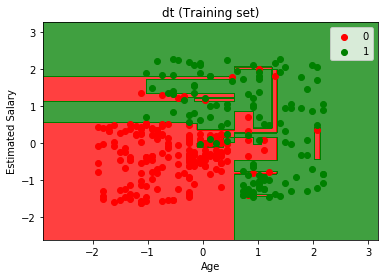

In [11]:
# skip the visualization
from matplotlib.colors import ListedColormap
X_set, y_set = trainx, trainy
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('dt (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


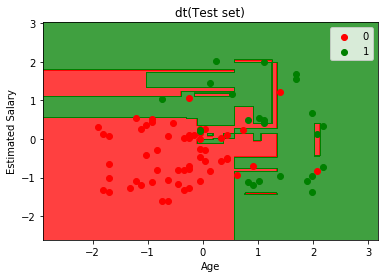

In [12]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = testx, testy
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('dt(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()